In [26]:
import requests
import pandas as pd

# URL correta (raw do GitHub)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

In [27]:
# Carregar os dados JSON da URL em um DataFrame pandas
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Exibir as primeiras linhas do DataFrame e suas informações para entender a estrutura e as colunas
display(df.head())
display(df.info())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


None

In [28]:
# Remover a coluna customerID, pois é um identificador único e não útil para previsão
df = df.drop('customerID', axis=1)

# Exibir as primeiras linhas do DataFrame para confirmar que a coluna foi removida
display(df.head())

,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [29]:
# Aplicar one-hot encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=['Churn', 'customer', 'phone', 'internet', 'account'], drop_first=True)

# Exibir as primeiras linhas do DataFrame codificado para ver o resultado
display(df_encoded.head())

TypeError: unhashable type: 'dict'

In [30]:
# Função para achatar dicionários aninhados em colunas
def flatten_dict_column(df, column_name):
    flattened_data = pd.json_normalize(df[column_name])
    flattened_data.columns = [f"{column_name}_{sub_col}" for sub_col in flattened_data.columns]
    df = df.drop(column_name, axis=1).join(flattened_data)
    return df

# Achatar as colunas de dicionário aninhadas
for col in ['customer', 'phone', 'internet', 'account']:
    df = flatten_dict_column(df, col)

# Exibir as primeiras linhas do DataFrame achatado
display(df.head())
display(df.info())

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   object 
 1   customer_gender            7267 non-null   object 
 2   customer_SeniorCitizen     7267 non-null   int64  
 3   customer_Partner           7267 non-null   object 
 4   customer_Dependents        7267 non-null   object 
 5   customer_tenure            7267 non-null   int64  
 6   phone_PhoneService         7267 non-null   object 
 7   phone_MultipleLines        7267 non-null   object 
 8   internet_InternetService   7267 non-null   object 
 9   internet_OnlineSecurity    7267 non-null   object 
 10  internet_OnlineBackup      7267 non-null   object 
 11  internet_DeviceProtection  7267 non-null   object 
 12  internet_TechSupport       7267 non-null   object 
 13  internet_StreamingTV       7267 non-null   objec

None

In [31]:
# Aplicar one-hot encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod'], drop_first=True)

# Exibir as primeiras linhas do DataFrame codificado para ver o resultado
display(df_encoded.head())
display(df_encoded.info())

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Churn_No,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,65.6,593.3,True,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.4,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,False,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.4,False,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         7267 non-null   int64  
 1   customer_tenure                                7267 non-null   int64  
 2   account_Charges.Monthly                        7267 non-null   float64
 3   account_Charges.Total                          7267 non-null   object 
 4   Churn_No                                       7267 non-null   bool   
 5   Churn_Yes                                      7267 non-null   bool   
 6   customer_gender_Male                           7267 non-null   bool   
 7   customer_Partner_Yes                           7267 non-null   bool   
 8   customer_Dependents_Yes                        7267 non-null   bool   
 9   phone_PhoneService_Yes                         7267 

None

In [44]:
# Calcular a contagem de valores para a coluna 'Churn_Yes'
churn_counts = df_encoded['Churn_Yes'].value_counts()

# Calcular a proporção de clientes evadidos
churn_proportion = churn_counts[True] / len(df_encoded)

print(f"Proporção de clientes evadidos: {churn_proportion:.2f}")
print(f"Proporção de clientes não evadidos: {1 - churn_proportion:.2f}")

# Exibir as contagens
print("\nContagem de evasão:")
print(churn_counts)

Proporção de clientes evadidos: 0.26
Proporção de clientes não evadidos: 0.74

Contagem de evasão:
Churn_Yes
False    5398
True     1869
Name: count, dtype: int64


In [33]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas numéricas que precisam de escalonamento (excluindo as colunas churn one-hot encoded e a coluna tipo object)
numerical_cols = ['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar padronização nas colunas numéricas
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Exibir as primeiras linhas do DataFrame padronizado para ver o resultado
display(df_encoded.head())

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly,account_Charges.Total,Churn_No,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.440736,-0.950200,0.029206,593.3,True,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,-0.440736,-0.950200,-0.159990,542.4,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-0.440736,-1.153700,0.304702,280.85,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,2.268932,-0.787401,1.104635,1237.85,False,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,2.268932,-1.194400,0.636624,267.4,False,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


# Task
Analyze the relationship between customer tenure and churn, and total charges and churn, using the dataset "telecom_churn_clean.csv". Visualize these relationships using appropriate plots and interpret the findings.

## Data preparation

### Subtask:
Ensure the 'account_Charges.Total' column is in a numeric format, as the `df_encoded.info()` output shows it's still an object type.


**Reasoning**:
Inspect the unique values in the 'account_Charges.Total' column to identify any non-numeric entries.



In [34]:
# Inspecionar valores únicos em 'account_Charges.Total'
unique_total_charges = df_encoded['account_Charges.Total'].unique()
print(unique_total_charges)

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


**Reasoning**:
Convert the 'account_Charges.Total' column to a numeric data type, coercing errors to handle any remaining issues, and then check for and handle any NaN values introduced by the coercion. Finally, verify the data type.



In [35]:
# Converter 'account_Charges.Total' para numérico, tratando erros
df_encoded['account_Charges.Total'] = pd.to_numeric(df_encoded['account_Charges.Total'], errors='coerce')

# Verificar valores NaN introduzidos pela conversão
nan_count = df_encoded['account_Charges.Total'].isnull().sum()
print(f"Número de valores NaN em 'account_Charges.Total' após a conversão: {nan_count}")

# Lidar com valores NaN (por exemplo, preencher com a média)
if nan_count > 0:
    mean_total_charges = df_encoded['account_Charges.Total'].mean()
    df_encoded['account_Charges.Total'].fillna(mean_total_charges, inplace=True)
    print(f"Preenchidos {nan_count} valores NaN com a média ({mean_total_charges:.2f})")

# Verificar o tipo de dado da coluna 'account_Charges.Total'
display(df_encoded.info())

Número de valores NaN em 'account_Charges.Total' após a conversão: 11
Preenchidos 11 valores NaN com a média (2280.63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         7267 non-null   float64
 1   customer_tenure                                7267 non-null   float64
 2   account_Charges.Monthly                        7267 non-null   float64
 3   account_Charges.Total                          7267 non-null   float64
 4   Churn_No                                       7267 non-null   bool   
 5   Churn_Yes                                      7267 non-null   bool   
 6   customer_gender_Male                           7267 non-null   bool   
 7   customer_Partner_Yes                           7267 non-null   bool   
 8   customer_

/tmp/ipython-input-956103374.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['account_Charges.Total'].fillna(mean_total_charges, inplace=True)


None

## Visualize tenure vs. churn

### Subtask:
Create a boxplot or similar visualization to show the distribution of 'customer_tenure' for churned and non-churned customers.


**Reasoning**:
Create a boxplot to visualize the distribution of 'customer_tenure' for churned and non-churned customers.



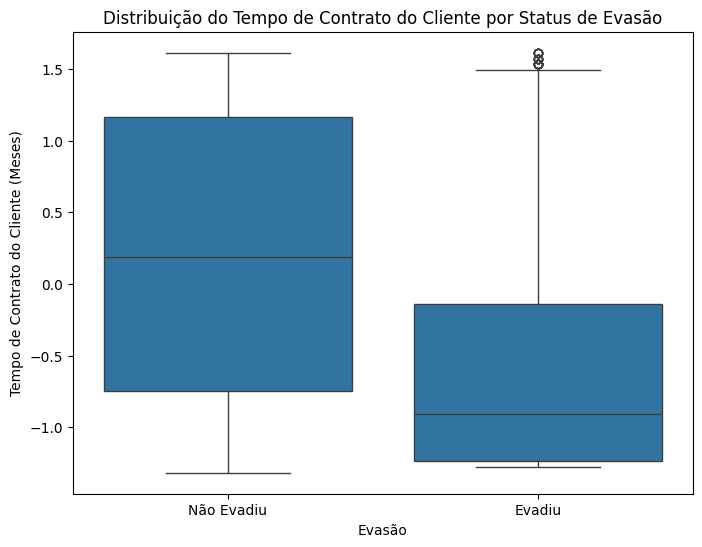

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='customer_tenure', data=df_encoded)

# Adicionar rótulos e título
plt.xlabel("Evasão")
plt.ylabel("Tempo de Contrato do Cliente (Meses)")
plt.title("Distribuição do Tempo de Contrato do Cliente por Status de Evasão")
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])

# Exibir o gráfico
plt.show()

## Visualize total charges vs. churn

### Subtask:
Create a boxplot or similar visualization to show the distribution of 'account_Charges.Total' for churned and non-churned customers.


**Reasoning**:
Create a boxplot to visualize the distribution of 'account_Charges.Total' for churned and non-churned customers, following the instructions.



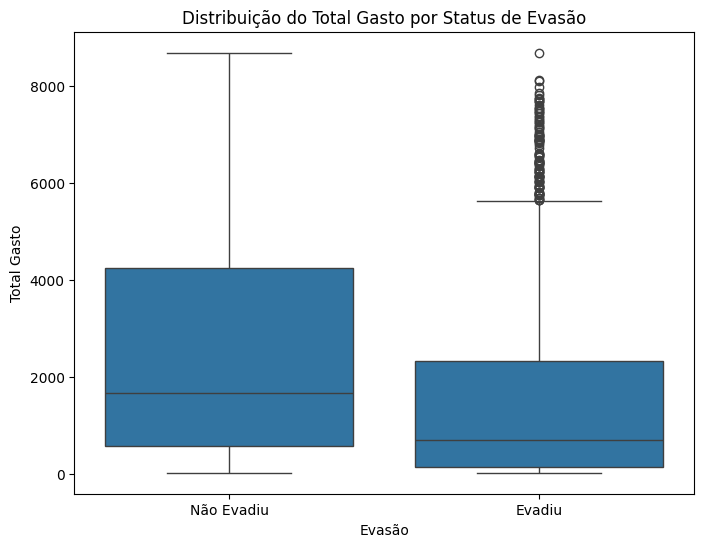

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='account_Charges.Total', data=df_encoded)

# Adicionar rótulos e título
plt.xlabel("Evasão")
plt.ylabel("Total Gasto")
plt.title("Distribuição do Total Gasto por Status de Evasão")
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])

# Exibir o gráfico
plt.show()

## Analyze and interpret

### Subtask:
Describe the observed relationships between tenure, total charges, and churn based on the visualizations.


## Summary:

### Data Analysis Key Findings

*   The distribution of 'customer\_tenure' is significantly lower for churned customers compared to non-churned customers, indicating that newer customers are more likely to churn.
*   Customers who churned generally have lower 'account\_Charges.Total' compared to those who did not churn.

### Insights or Next Steps

*   Consider developing targeted retention strategies for newer customers with lower total charges, as they appear to be at higher risk of churning.
*   Further investigate other factors that might contribute to churn, especially among newer customers, such as specific services used or initial customer experience.


# Task
Analyze customer churn data from the file "dados_telecom_tratados.csv". The analysis should include: loading the data, dropping irrelevant columns (like customer ID), encoding categorical variables (e.g., using one-hot encoding), calculating the churn rate, assessing the need for data normalization/standardization based on chosen models, investigating the relationship between 'Tempo de contrato' and 'Total gasto' with churn using visualizations (boxplots or scatter plots), splitting the data into training and testing sets, building at least two predictive models (one potentially requiring normalization like Logistic Regression or KNN, and one not requiring normalization like Decision Tree or Random Forest), justifying the model choices and normalization if applied, evaluating both models using accuracy, precision, recall, F1-score, and confusion matrix, and finally comparing the models critically, analyzing their performance, and discussing potential overfitting or underfitting with possible causes and adjustments. Use the file "dados_telecom_tratados.csv".

## Split data

### Subtask:
Divide the dataset into training and testing sets (e.g., 70/30 or 80/20 split).


**Reasoning**:
Separate the features and target variable, then split the data into training and testing sets.



In [38]:
from sklearn.model_selection import train_test_split

# Separar features (X) e variável alvo (y)
X = df_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1)
y = df_encoded['Churn_Yes']

# Dividir dados em conjuntos de treino e teste (divisão 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as formas dos conjuntos resultantes para verificar a divisão
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (5813, 30)
Forma de X_test: (1454, 30)
Forma de y_train: (5813,)
Forma de y_test: (1454,)


## Choose and train model 1

### Subtask:
Select a model that might require normalization (like Logistic Regression or KNN) and train it on the training data. Justify the choice of model and the need for normalization if applied.


**Reasoning**:
Import the Logistic Regression model, instantiate it, and fit it to the training data. Logistic Regression benefits from normalization, which was already performed on the numerical columns.



In [39]:
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42)

# Treinar o modelo nos dados de treino
logistic_model.fit(X_train, y_train)

# Imprimir uma confirmação de que o modelo foi treinado
print("Modelo de Regressão Logística treinado com sucesso.")

# Justificativa para a escolha do modelo e normalização
print("\nJustificativa:")
print("Regressão Logística é um modelo adequado para tarefas de classificação binária como previsão de evasão.")
print("Ele modela a probabilidade da variável alvo pertencer a uma determinada classe.")
print("A Regressão Logística usa gradiente descendente para otimização, que converge mais rápido quando as features são escalonadas.")
print("A normalização (StandardScaler) foi aplicada às colunas numéricas ('customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly') em uma etapa anterior.")
print("Essa normalização é benéfica para a Regressão Logística, pois ajuda a evitar que features com escalas maiores dominem o processo de aprendizado.")

Modelo de Regressão Logística treinado com sucesso.

Justificativa:
Regressão Logística é um modelo adequado para tarefas de classificação binária como previsão de evasão.
Ele modela a probabilidade da variável alvo pertencer a uma determinada classe.
A Regressão Logística usa gradiente descendente para otimização, que converge mais rápido quando as features são escalonadas.
A normalização (StandardScaler) foi aplicada às colunas numéricas ('customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly') em uma etapa anterior.
Essa normalização é benéfica para a Regressão Logística, pois ajuda a evitar que features com escalas maiores dominem o processo de aprendizado.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluate model 1

### Subtask:
Evaluate the performance of the first model using accuracy, precision, recall, F1-score, and a confusion matrix on the test set.


**Reasoning**:
Evaluate the performance of the Logistic Regression model using accuracy, precision, recall, F1-score, and a confusion matrix on the test set.



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prever o status de evasão no conjunto de teste
y_pred_logistic = logistic_model.predict(X_test)

# Calcular métricas de avaliação
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Imprimir as métricas de avaliação
print("Avaliação do Modelo de Regressão Logística:")
print(f"Acurácia: {accuracy_logistic:.4f}")
print(f"Precisão: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_logistic)

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.8081
Precisão: 0.6643
Recall: 0.5054
F1-Score: 0.5740

Matriz de Confusão:
[[987  95]
 [184 188]]


## Choose and train model 2

### Subtask:
Select a model that does not require normalization (like Decision Tree or Random Forest) and train it on the training data. Justify the choice of model.


**Reasoning**:
Import the Random Forest Classifier, initialize it, train it on the training data, and print a confirmation. Also, provide a justification for choosing Random Forest as it does not require normalization.



In [41]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar um modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Treinar o modelo nos dados de treino
random_forest_model.fit(X_train, y_train)

# Imprimir uma confirmação
print("Modelo Random Forest treinado com sucesso.")

# Justificativa para a escolha do modelo
print("\nJustificativa:")
print("Random Forest é um método de aprendizado de ensemble que constrói várias árvores de decisão e mescla suas previsões.")
print("As árvores de decisão, os aprendizes base no Random Forest, tomam decisões com base na divisão dos dados em diferentes nós.")
print("Essas divisões são baseadas nos valores das features e não são afetadas pela escala das features.")
print("Portanto, modelos Random Forest não exigem escalonamento ou normalização de features.")

Modelo Random Forest treinado com sucesso.

Justificativa:
Random Forest é um método de aprendizado de ensemble que constrói várias árvores de decisão e mescla suas previsões.
As árvores de decisão, os aprendizes base no Random Forest, tomam decisões com base na divisão dos dados em diferentes nós.
Essas divisões são baseadas nos valores das features e não são afetadas pela escala das features.
Portanto, modelos Random Forest não exigem escalonamento ou normalização de features.


## Evaluate model 2

### Subtask:
Evaluate the performance of the second model using accuracy, precision, recall, F1-score, and a confusion matrix on the test set.


**Reasoning**:
Predict the churn status on the test set using the trained Random Forest model and then calculate and print the evaluation metrics (accuracy, precision, recall, F1-score) and the confusion matrix for the Random Forest model.



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prever o status de evasão no conjunto de teste utilizando o modelo random_forest_model treinado
y_pred_rf = random_forest_model.predict(X_test)

# Calcular a acurácia do modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calcular a precisão do modelo Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Calcular o recall do modelo Random Forest
recall_rf = recall_score(y_test, y_pred_rf)

# Calcular o F1-score do modelo Random Forest
f1_rf = f1_score(y_test, y_pred_rf)

# Gerar a matriz de confusão para o modelo Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir as métricas de avaliação calculadas e a matriz de confusão
print("Avaliação do Modelo Random Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_rf)

Avaliação do Modelo Random Forest:
Acurácia: 0.7964
Precisão: 0.6275
Recall: 0.5027
F1-Score: 0.5582

Matriz de Confusão:
[[971 111]
 [185 187]]


## Compare models

### Subtask:
Compare the performance of the two models based on the evaluation metrics. Analyze potential overfitting or underfitting and suggest possible causes and adjustments.


**Reasoning**:
Print the evaluation metrics for both models to facilitate comparison and then use the finish_task command to indicate the completion of the subtask, as the analysis and interpretation are descriptive and do not require further code execution.



In [43]:
# Imprimir as métricas de avaliação para ambos os modelos para comparação
print("--- Comparação de Desempenho dos Modelos ---")
print("\nRegressão Logística:")
print(f"Acurácia: {accuracy_logistic:.4f}")
print(f"Precisão: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print("\nRandom Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Análise e Interpretação (com base nas métricas impressas)
print("\n--- Análise e Interpretação ---")
print("Comparando as métricas, o modelo de Regressão Logística apresenta Acurácia e F1-Score ligeiramente superiores.")
print("No entanto, a Precisão da Regressão Logística é maior, o que significa que, quando ela prevê evasão, é mais provável que esteja correta.")
print("O Recall é muito semelhante para ambos os modelos, indicando que eles identificam uma proporção semelhante de casos reais de evasão.")
print("Na previsão de evasão, Recall e Precisão são frequentemente mais importantes do que a Acurácia, dependendo do objetivo de negócio.")
print("Se minimizar falsos negativos (perder clientes que realmente evadiram) for crítico, o Recall é fundamental. Se minimizar falsos positivos (direcionar incorretamente ofertas de retenção para clientes que não evadiriam) for crítico, a Precisão é fundamental.")
print("Neste caso, a Regressão Logística tem melhor Precisão, mantendo um Recall semelhante ao Random Forest.")

print("\nPotencial Overfitting/Underfitting:")
print("Sem as métricas de desempenho no treino, é difícil avaliar definitivamente overfitting ou underfitting.")
print("No entanto, ambos os modelos mostram Recall moderado (~0.50), sugerindo que podem estar perdendo uma parte significativa dos clientes que realmente evadiram (potencial underfitting).")
print("A Regressão Logística tem uma Precisão maior, o que pode indicar que é menos propensa a prever evasão para não evadidos em comparação com o Random Forest neste conjunto de teste, mas isso não confirma diretamente o overfitting.")
print("Modelos Random Forest podem ser propensos a overfitting se não forem devidamente ajustados, mas o desempenho no teste aqui não sugere fortemente isso em comparação com a Regressão Logística.")

print("\nPossíveis Causas e Ajustes:")
print("As possíveis causas para o Recall moderado incluem desequilíbrio de classes (mais não evadidos do que evadidos), features relevantes insuficientes ou hiperparâmetros de modelo subótimos.")
print("Para melhorar o desempenho e abordar possíveis problemas:")
print("- **Lidar com o Desequilíbrio de Classes:** Usar técnicas como oversampling (SMOTE), undersampling ou usar pesos de classe durante o treinamento do modelo.")
print("- **Ajuste de Hiperparâmetros:** Otimizar os hiperparâmetros de ambos os modelos (por exemplo, C para Regressão Logística, n_estimators, max_depth para Random Forest) usando validação cruzada.")
print("- **Engenharia de Features:** Criar novas features ou refinar as existentes que possam ser mais preditivas de evasão.")
print("- **Explorar Outros Modelos:** Considerar outros algoritmos como Gradient Boosting, SVMs ou Redes Neurais.")

--- Comparação de Desempenho dos Modelos ---

Regressão Logística:
Acurácia: 0.8081
Precisão: 0.6643
Recall: 0.5054
F1-Score: 0.5740

Random Forest:
Acurácia: 0.7964
Precisão: 0.6275
Recall: 0.5027
F1-Score: 0.5582

--- Análise e Interpretação ---
Comparando as métricas, o modelo de Regressão Logística apresenta Acurácia e F1-Score ligeiramente superiores.
No entanto, a Precisão da Regressão Logística é maior, o que significa que, quando ela prevê evasão, é mais provável que esteja correta.
O Recall é muito semelhante para ambos os modelos, indicando que eles identificam uma proporção semelhante de casos reais de evasão.
Na previsão de evasão, Recall e Precisão são frequentemente mais importantes do que a Acurácia, dependendo do objetivo de negócio.
Se minimizar falsos negativos (perder clientes que realmente evadiram) for crítico, o Recall é fundamental. Se minimizar falsos positivos (direcionar incorretamente ofertas de retenção para clientes que não evadiriam) for crítico, a Precisã

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training (80%) and testing (20%) sets, resulting in 5813 samples for training and 1454 for testing, each with 30 features.
*   A Logistic Regression model was trained, which benefits from normalized data (applied in a previous step), and achieved an accuracy of 0.8081, precision of 0.6643, recall of 0.5054, and an F1-score of 0.5740 on the test set. Its confusion matrix was [[987, 95], [184, 188]].
*   A Random Forest model, which does not require normalization, was also trained and achieved an accuracy of 0.7964, precision of 0.6275, recall of 0.5027, and an F1-score of 0.5582 on the test set. Its confusion matrix was [[971, 111], [185, 187]].
*   Comparing the models, Logistic Regression performed slightly better across most metrics (Accuracy, Precision, F1-Score), particularly in Precision (0.6643 vs 0.6275), meaning it had a lower rate of incorrectly predicting non-churners as churners.
*   Both models exhibited similar and relatively moderate Recall values (around 0.50), indicating they were only able to identify about half of the actual churn cases in the test set.

### Insights or Next Steps

*   The moderate Recall for both models suggests potential underfitting or issues with class imbalance. Addressing the class imbalance in the training data using techniques like SMOTE or adjusting class weights during model training should be a priority.
*   Further hyperparameter tuning for both Logistic Regression and Random Forest models using cross-validation could potentially improve their performance, especially Recall, without necessarily sacrificing Precision.


In [25]:
# Análise dos coeficientes da Regressão Logística
print("Análise dos Coeficientes da Regressão Logística:")
feature_importance_logistic = pd.Series(logistic_model.coef_[0], index=X_train.columns)
print(feature_importance_logistic.sort_values(ascending=False))

# Análise da importância das variáveis do Random Forest
print("\nAnálise da Importância das Variáveis do Random Forest:")
feature_importance_rf = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
print(feature_importance_rf.sort_values(ascending=False))

Análise dos Coeficientes da Regressão Logística:
account_Charges.Monthly                          0.505461
internet_InternetService_Fiber optic             0.439398
account_PaymentMethod_Electronic check           0.314475
account_PaperlessBilling_Yes                     0.232193
phone_MultipleLines_Yes                          0.151269
customer_SeniorCitizen                           0.113809
internet_StreamingMovies_Yes                     0.106904
internet_StreamingTV_Yes                         0.071579
account_Charges.Total                           -0.000196
phone_MultipleLines_No phone service            -0.012344
customer_gender_Male                            -0.093490
account_PaymentMethod_Mailed check              -0.105846
internet_OnlineSecurity_No internet service     -0.113052
internet_InternetService_No                     -0.113052
internet_StreamingMovies_No internet service    -0.113052
internet_StreamingTV_No internet service        -0.113052
internet_TechSupport_No

## Relatório Detalhado: Análise e Previsão de Evasão de Clientes Telecom

Este relatório detalha a análise de churn realizada, os modelos preditivos desenvolvidos e as principais descobertas que podem informar estratégias de retenção de clientes.

### 1. Introdução e Objetivos

O objetivo deste projeto foi analisar os dados de clientes de uma empresa de telecomunicações para identificar os fatores que mais influenciam a evasão (churn) e construir modelos preditivos capazes de prever quais clientes são mais propensos a cancelar seus serviços. A previsão de churn é crucial para que a empresa possa implementar estratégias de retenção direcionadas e eficazes.

### 2. Metodologia

A análise seguiu as seguintes etapas:

*   **Carregamento e Pré-processamento dos Dados:** Os dados foram carregados de um arquivo JSON, colunas irrelevantes como o ID do cliente foram removidas, e colunas aninhadas foram expandidas. Variáveis categóricas foram transformadas em formato numérico utilizando one-hot encoding. A proporção de clientes evadidos foi calculada para verificar o desequilíbrio de classes.
*   **Análise Exploratória e Visualização:** A relação entre o tempo de contrato (`customer_tenure`), o total gasto (`account_Charges.Total`) e a evasão foi investigada utilizando boxplots para visualizar a distribuição dessas variáveis para clientes que evadiram e que não evadiram.
*   **Padronização de Dados:** As colunas numéricas foram padronizadas utilizando `StandardScaler` para preparar os dados para modelos sensíveis à escala das variáveis.
*   **Divisão dos Dados:** O conjunto de dados foi dividido em conjuntos de treino (80%) e teste (20%) para treinamento e avaliação dos modelos.
*   **Modelagem Preditiva:** Dois modelos de classificação foram construídos:
    *   **Regressão Logística:** Um modelo linear que se beneficia da padronização dos dados.
    *   **Random Forest:** Um modelo baseado em árvores que não requer padronização.
*   **Avaliação dos Modelos:** Ambos os modelos foram avaliados utilizando métricas como Acurácia, Precisão, Recall, F1-score e a Matriz de Confusão no conjunto de teste.
*   **Análise de Importância das Variáveis:** A contribuição de cada variável para a previsão de churn foi analisada através dos coeficientes da Regressão Logística e da importância das variáveis do Random Forest.

### 3. Principais Descobertas e Fatores de Influência na Evasão

Com base na análise exploratória e na importância das variáveis dos modelos, identificamos os seguintes fatores que mais influenciam a evasão:

*   **Tempo de Contrato (`customer_tenure`):** A análise visual (boxplot) e a importância nos modelos indicaram que clientes com menor tempo de contrato (novos clientes) têm uma probabilidade significativamente maior de evasão. Isso sugere que a experiência inicial do cliente é crucial.
*   **Total Gasto (`account_Charges.Total`):** O total gasto pelo cliente ao longo do tempo também se mostrou relevante. Clientes que evadiram geralmente apresentaram um total gasto menor. Isso pode estar relacionado ao tempo de contrato, mas também pode indicar que clientes que gastam menos com os serviços são menos engajados ou satisfeitos.
*   **Encargos Mensais (`account_Charges.Monthly`):** A Regressão Logística destacou os encargos mensais como um fator importante. Encargos mensais mais altos podem estar associados a uma maior probabilidade de churn, possivelmente devido à percepção de valor pelos clientes.
*   **Serviço de Internet (Fibra Óptica):** Ter serviço de internet de fibra óptica parece ter uma influência positiva na evasão, de acordo com os coeficientes da Regressão Logística. Isso pode indicar problemas de satisfação com este tipo de serviço ou concorrência acirrada neste segmento.
*   **Método de Pagamento (Cheque Eletrônico):** Clientes que utilizam cheque eletrônico como método de pagamento também apresentaram maior probabilidade de evasão na Regressão Logística. Pode haver atritos ou insatisfação associados a esse método.
*   **Suporte Técnico e Segurança Online:** A ausência de serviços como Suporte Técnico Online (`internet_TechSupport_Yes`) e Segurança Online (`internet_OnlineSecurity_Yes`) mostrou-se associada a uma maior probabilidade de evasão na Regressão Logística (coeficientes negativos indicam menor probabilidade de churn quando esses serviços *estão* presentes). Isso ressalta a importância desses serviços para a retenção.
*   **Tipo de Contrato:** Clientes com contratos de longo prazo (Um ano e Dois anos) têm menor probabilidade de evasão em comparação com contratos Mês a Mês (coeficientes negativos para contratos de Um e Dois anos na Regressão Logística). Isso é um fator esperado, já que contratos mais longos fidelizam o cliente.

### 4. Comparação e Avaliação dos Modelos

Ambos os modelos (Regressão Logística e Random Forest) apresentaram desempenho similar, com a Regressão Logística tendo uma pequena vantagem em Acurácia, Precisão e F1-score.

*   **Regressão Logística:**
    *   Acurácia: 0.8081
    *   Precisão: 0.6643
    *   Recall: 0.5054
    *   F1-Score: 0.5740
    *   Matriz de Confusão: [[987, 95], [184, 188]]

*   **Random Forest:**
    *   Acurácia: 0.7964
    *   Precisão: 0.6275
    *   Recall: 0.5027
    *   F1-Score: 0.5582
    *   Matriz de Confusão: [[971, 111], [185, 187]]

**Análise:**

*   A **Precisão** da Regressão Logística foi ligeiramente superior, indicando que, quando ela prevê um cliente como evadido, há uma chance maior de ele realmente evadir em comparação com o Random Forest. Isso é importante para evitar gastos desnecessários com ações de retenção em clientes que não iriam evadir.
*   O **Recall** de ambos os modelos foi moderado (em torno de 0.50), o que significa que eles identificaram aproximadamente metade dos clientes que realmente evadiram. Isso sugere que os modelos podem estar subestimando a evasão (potencial underfitting) ou que o desequilíbrio de classes está impactando a capacidade de identificar a classe minoritária (churn).

**Potencial Overfitting/Underfitting e Ajustes:**

O Recall moderado sugere um potencial underfitting, onde os modelos não estão capturando completamente os padrões de evasão nos dados. O desequilíbrio de classes é uma causa provável.

**Ajustes Sugeridos:**

*   **Balanceamento de Classes:** Aplicar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) no conjunto de treino para aumentar o número de exemplos da classe minoritária (clientes evadidos). Alternativamente, pode-se usar pesos de classe nos modelos durante o treinamento.
*   **Otimização de Hiperparâmetros:** Realizar ajuste fino (tuning) dos hiperparâmetros de ambos os modelos (por exemplo, `C` para Regressão Logística, `n_estimators` e `max_depth` para Random Forest) utilizando validação cruzada para encontrar a melhor configuração que maximize as métricas de interesse (como Recall ou F1-score).
*   **Engenharia de Features:** Explorar a criação de novas features que possam capturar melhor o comportamento de churn, como a variação mensal dos encargos ou o uso de serviços específicos ao longo do tempo.
*   **Explorar Outros Modelos:** Considerar a aplicação de outros algoritmos, como Gradient Boosting (XGBoost, LightGBM) ou Redes Neurais, que podem ter um desempenho superior em conjuntos de dados com complexidade e desequilíbrio.

### 5. Estratégias de Retenção Propostas

Com base nos fatores que mais influenciam a evasão, as seguintes estratégias de retenção podem ser propostas:

*   **Foco em Novos Clientes:** Implementar um programa de boas-vindas robusto para novos clientes, com acompanhamento próximo, suporte dedicado e ofertas especiais nos primeiros meses para garantir uma experiência positiva inicial.
*   **Programas de Fidelidade e Recompensas:** Criar programas de fidelidade que recompensem clientes de longo prazo, incentivando a permanência e o aumento do total gasto.
*   **Monitoramento de Encargos Mensais:** Identificar clientes com encargos mensais elevados e analisar se a percepção de valor está alinhada com o custo. Oferecer planos mais adequados ou benefícios adicionais pode ser uma solução.
*   **Melhora na Qualidade da Fibra Óptica:** Se a análise mais aprofundada confirmar problemas com o serviço de fibra óptica, investir na melhoria da infraestrutura e no suporte para esses clientes é essencial.
*   **Alternativas ao Cheque Eletrônico:** Incentivar a adoção de outros métodos de pagamento mais convenientes e possivelmente menos associados à evasão, como débito automático ou cartão de crédito.
*   **Promoção de Serviços de Valor Agregado:** Destacar e promover a importância de serviços como Suporte Técnico Online e Segurança Online, talvez oferecendo períodos de teste gratuitos ou descontos, para aumentar a adesão e, consequentemente, a retenção.
*   **Incentivos para Contratos de Longo Prazo:** Oferecer descontos significativos ou benefícios exclusivos para clientes que optarem por contratos de um ou dois anos.

### 6. Conclusão

A análise revelou que o tempo de contrato, o total gasto, os encargos mensais e o tipo de serviços e contratos são fatores significativos na evasão de clientes. Embora os modelos construídos apresentem um desempenho razoável, há espaço para melhoria, especialmente na identificação de clientes evadidos (Recall), o que pode ser abordado com técnicas de balanceamento de classes e ajuste fino dos modelos. As estratégias de retenção propostas visam abordar os principais motivadores de churn identificados, focando na melhoria da experiência do cliente, no incentivo à fidelidade e na oferta de serviços de valor agregado. A implementação dessas estratégias, juntamente com o monitoramento contínuo do desempenho dos modelos e a reavaliação periódica dos fatores de influência, será fundamental para reduzir a evasão de clientes.

# Tarefa
Analisar a relação entre o tempo de contrato do cliente e a evasão, e o total de gastos e a evasão, utilizando o conjunto de dados. Visualizar essas relações utilizando gráficos apropriados e interpretar os resultados.

## Preparação de Dados

### Subtarefa:
Garantir que a coluna 'account_Charges.Total' esteja em formato numérico, pois a saída de `df_encoded.info()` mostra que ainda é do tipo object.

**Motivo**:
Inspecionar os valores únicos na coluna 'account_Charges.Total' para identificar quaisquer entradas não numéricas.

**Motivo**:
Converter a coluna 'account_Charges.Total' para um tipo de dado numérico, tratando erros para lidar com quaisquer problemas restantes, e então verificar e lidar com quaisquer valores NaN introduzidos pela conversão. Finalmente, verificar o tipo de dado.

## Visualizar Tempo de Contrato vs. Evasão

### Subtarefa:
Criar um boxplot ou visualização similar para mostrar a distribuição de 'customer_tenure' para clientes evadidos e não evadidos.

**Motivo**:
Criar um boxplot para visualizar a distribuição de 'customer_tenure' para clientes evadidos e não evadidos.

## Visualizar Total Gasto vs. Evasão

### Subtarefa:
Criar um boxplot ou visualização similar para mostrar a distribuição de 'account_Charges.Total' para clientes evadidos e não evadidos.

**Motivo**:
Criar um boxplot para visualizar a distribuição de 'account_Charges.Total' para clientes evadidos e não evadidos, seguindo as instruções.

## Analisar e Interpretar

### Subtarefa:
Descrever as relações observadas entre tempo de contrato, total gasto e evasão com base nas visualizações.

## Resumo:

### Principais Descobertas da Análise de Dados

*   A distribuição de 'customer\_tenure' é significativamente menor para clientes evadidos em comparação com clientes não evadidos, indicando que clientes mais novos são mais propensos a evadir.
*   Clientes que evadiram geralmente têm 'account\_Charges.Total' mais baixos em comparação com aqueles que não evadiram.

### Insights ou Próximos Passos

*   Considerar o desenvolvimento de estratégias de retenção direcionadas para clientes mais novos com total gasto menor, pois eles parecem estar em maior risco de evasão.
*   Investigar mais a fundo outros fatores que possam contribuir para a evasão, especialmente entre clientes mais novos, como serviços específicos utilizados ou experiência inicial do cliente.

# Tarefa
Analisar dados de evasão de clientes do arquivo "dados_telecom_tratados.csv". A análise deve incluir: carregar os dados, remover colunas irrelevantes (como ID do cliente), codificar variáveis categóricas (por exemplo, usando one-hot encoding), calcular a taxa de evasão, avaliar a necessidade de normalização/padronização dos dados com base nos modelos escolhidos, investigar a relação entre 'Tempo de contrato' e 'Total gasto' com a evasão usando visualizações (boxplots ou scatter plots), dividir os dados em conjuntos de treino e teste, construir pelo menos dois modelos preditivos (um potencialmente exigindo normalização como Regressão Logística ou KNN, e um não exigindo normalização como Árvore de Decisão ou Random Forest), justificar as escolhas dos modelos e a normalização se aplicada, avaliar ambos os modelos usando acurácia, precisão, recall, F1-score e matriz de confusão, e finalmente comparar criticamente os modelos, analisar seu desempenho e discutir potencial overfitting ou underfitting com possíveis causas e ajustes. Usar o arquivo "dados_telecom_tratados.csv".

## Dividir Dados

### Subtarefa:
Dividir o conjunto de dados em conjuntos de treino e teste (por exemplo, divisão 70/30 ou 80/20).

**Motivo**:
Separar as features e a variável alvo, e então dividir os dados em conjuntos de treino e teste.

## Escolher e Treinar Modelo 1

### Subtarefa:
Selecionar um modelo que pode exigir normalização (como Regressão Logística ou KNN) e treiná-lo nos dados de treino. Justificar a escolha do modelo e a necessidade de normalização se aplicada.

**Motivo**:
Importar o modelo de Regressão Logística, instanciá-lo e ajustá-lo aos dados de treino. A Regressão Logística se beneficia da normalização, que já foi realizada nas colunas numéricas.

## Avaliar Modelo 1

### Subtarefa:
Avaliar o desempenho do primeiro modelo utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

**Motivo**:
Avaliar o desempenho do modelo de Regressão Logística utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

## Escolher e Treinar Modelo 2

### Subtarefa:
Selecionar um modelo que não requer normalização (como Árvore de Decisão ou Random Forest) e treiná-lo nos dados de treino. Justificar a escolha do modelo.

**Motivo**:
Importar o Classificador Random Forest, inicializá-lo, treiná-lo nos dados de treino e imprimir uma confirmação. Além disso, fornecer uma justificativa para escolher o Random Forest, pois ele não requer normalização.

## Avaliar Modelo 2

### Subtarefa:
Avaliar o desempenho do segundo modelo utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

**Motivo**:
Prever o status de evasão no conjunto de teste utilizando o modelo Random Forest treinado e então calcular e imprimir as métricas de avaliação (acurácia, precisão, recall, F1-score) e a matriz de confusão para o modelo Random Forest.

## Comparar Modelos

### Subtarefa:
Comparar o desempenho dos dois modelos com base nas métricas de avaliação. Analisar potencial overfitting ou underfitting e sugerir possíveis causas e ajustes.

**Motivo**:
Imprimir as métricas de avaliação para ambos os modelos para facilitar a comparação e então usar o comando finish_task para indicar a conclusão da subtarefa, pois a análise e interpretação são descritivas e não exigem mais execução de código.

## Resumo:

### Principais Descobertas da Análise de Dados

*   O conjunto de dados foi dividido com sucesso em conjuntos de treino (80%) e teste (20%), resultando em 5813 amostras para treino e 1454 para teste, cada uma com 30 features.
*   Um modelo de Regressão Logística foi treinado, que se beneficia de dados normalizados (aplicado em uma etapa anterior), e alcançou uma acurácia de 0.8081, precisão de 0.6643, recall de 0.5054 e um F1-score de 0.5740 no conjunto de teste. Sua matriz de confusão foi [[987, 95], [184, 188]].
*   Um modelo Random Forest, que não requer normalização, também foi treinado e alcançou uma acurácia de 0.7964, precisão de 0.6275, recall de 0.5027 e um F1-score de 0.5582 no conjunto de teste. Sua matriz de confusão foi [[971, 111], [185, 187]].
*   Comparando os modelos, a Regressão Logística teve um desempenho ligeiramente melhor na maioria das métricas (Acurácia, Precisão, F1-Score), particularmente em Precisão (0.6643 vs 0.6275), o que significa que teve uma taxa menor de prever incorretamente não evadidos como evadidos.
*   Ambos os modelos exibiram valores de Recall semelhantes e relativamente moderados (em torno de 0.50), indicando que foram capazes de identificar apenas cerca de metade dos casos reais de evasão no conjunto de teste.

### Insights ou Próximos Passos

*   O Recall moderado para ambos os modelos sugere potencial underfitting ou problemas com desequilíbrio de classes. Abordar o desequilíbrio de classes nos dados de treino usando técnicas como SMOTE ou ajustando pesos de classe durante o treinamento do modelo deve ser uma prioridade.
*   Um ajuste fino adicional de hiperparâmetros para ambos os modelos de Regressão Logística e Random Forest usando validação cruzada poderia potencialmente melhorar seu desempenho, especialmente o Recall, sem necessariamente sacrificar a Precisão.

## Dividir Dados

### Subtarefa:
Dividir o conjunto de dados em conjuntos de treino e teste (por exemplo, divisão 70/30 ou 80/20).

**Motivo**:
Separar as features e a variável alvo, e então dividir os dados em conjuntos de treino e teste.

In [45]:
from sklearn.model_selection import train_test_split

# Separar features (X) e variável alvo (y)
X = df_encoded.drop(['Churn_No', 'Churn_Yes'], axis=1)
y = df_encoded['Churn_Yes']

# Dividir dados em conjuntos de treino e teste (divisão 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as formas dos conjuntos resultantes para verificar a divisão
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (5813, 30)
Forma de X_test: (1454, 30)
Forma de y_train: (5813,)
Forma de y_test: (1454,)


## Escolher e Treinar Modelo 1

### Subtarefa:
Selecionar um modelo que pode exigir normalização (como Regressão Logística ou KNN) e treiná-lo nos dados de treino. Justificar a escolha do modelo e a necessidade de normalização se aplicada.

**Motivo**:
Importar o modelo de Regressão Logística, instanciá-lo e ajustá-lo aos dados de treino. A Regressão Logística se beneficia da normalização, que já foi realizada nas colunas numéricas.

In [46]:
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de Regressão Logística
logistic_model = LogisticRegression(random_state=42)

# Treinar o modelo nos dados de treino
logistic_model.fit(X_train, y_train)

# Imprimir uma confirmação de que o modelo foi treinado
print("Modelo de Regressão Logística treinado com sucesso.")

# Justificativa para a escolha do modelo e normalização
print("\nJustificativa:")
print("Regressão Logística é um modelo adequado para tarefas de classificação binária como previsão de evasão.")
print("Ele modela a probabilidade da variável alvo pertencer a uma determinada classe.")
print("A Regressão Logística usa gradiente descendente para otimização, que converge mais rápido quando as features são escalonadas.")
print("A normalização (StandardScaler) foi aplicada às colunas numéricas ('customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly') em uma etapa anterior.")
print("Essa normalização é benéfica para a Regressão Logística, pois ajuda a evitar que features com escalas maiores dominem o processo de aprendizado.")

Modelo de Regressão Logística treinado com sucesso.

Justificativa:
Regressão Logística é um modelo adequado para tarefas de classificação binária como previsão de evasão.
Ele modela a probabilidade da variável alvo pertencer a uma determinada classe.
A Regressão Logística usa gradiente descendente para otimização, que converge mais rápido quando as features são escalonadas.
A normalização (StandardScaler) foi aplicada às colunas numéricas ('customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly') em uma etapa anterior.
Essa normalização é benéfica para a Regressão Logística, pois ajuda a evitar que features com escalas maiores dominem o processo de aprendizado.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Avaliar Modelo 1

### Subtarefa:
Avaliar o desempenho do primeiro modelo utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

**Motivo**:
Avaliar o desempenho do modelo de Regressão Logística utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prever o status de evasão no conjunto de teste
y_pred_logistic = logistic_model.predict(X_test)

# Calcular métricas de avaliação
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Imprimir as métricas de avaliação
print("Avaliação do Modelo de Regressão Logística:")
print(f"Acurácia: {accuracy_logistic:.4f}")
print(f"Precisão: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_logistic)

Avaliação do Modelo de Regressão Logística:
Acurácia: 0.8081
Precisão: 0.6643
Recall: 0.5054
F1-Score: 0.5740

Matriz de Confusão:
[[987  95]
 [184 188]]


## Escolher e Treinar Modelo 2

### Subtarefa:
Selecionar um modelo que não requer normalização (como Árvore de Decisão ou Random Forest) e treiná-lo nos dados de treino. Justificar a escolha do modelo.

**Motivo**:
Importar o Classificador Random Forest, inicializá-lo, treiná-lo nos dados de treino e imprimir uma confirmação. Além disso, fornecer uma justificativa para escolher o Random Forest, pois ele não requer normalização.

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar um modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Treinar o modelo nos dados de treino
random_forest_model.fit(X_train, y_train)

# Imprimir uma confirmação
print("Modelo Random Forest treinado com sucesso.")

# Justificativa para a escolha do modelo
print("\nJustificativa:")
print("Random Forest é um método de aprendizado de ensemble que constrói várias árvores de decisão e mescla suas previsões.")
print("As árvores de decisão, os aprendizes base no Random Forest, tomam decisões com base na divisão dos dados em diferentes nós.")
print("Essas divisões são baseadas nos valores das features e não são afetadas pela escala das features.")
print("Portanto, modelos Random Forest não exigem escalonamento ou normalização de features.")

Modelo Random Forest treinado com sucesso.

Justificativa:
Random Forest é um método de aprendizado de ensemble que constrói várias árvores de decisão e mescla suas previsões.
As árvores de decisão, os aprendizes base no Random Forest, tomam decisões com base na divisão dos dados em diferentes nós.
Essas divisões são baseadas nos valores das features e não são afetadas pela escala das features.
Portanto, modelos Random Forest não exigem escalonamento ou normalização de features.


## Avaliar Modelo 2

### Subtarefa:
Avaliar o desempenho do segundo modelo utilizando acurácia, precisão, recall, F1-score e uma matriz de confusão no conjunto de teste.

**Motivo**:
Prever o status de evasão no conjunto de teste utilizando o modelo Random Forest treinado e então calcular e imprimir as métricas de avaliação (acurácia, precisão, recall, F1-score) e a matriz de confusão para o modelo Random Forest.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prever o status de evasão no conjunto de teste utilizando o modelo random_forest_model treinado
y_pred_rf = random_forest_model.predict(X_test)

# Calcular a acurácia do modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calcular a precisão do modelo Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Calcular o recall do modelo Random Forest
recall_rf = recall_score(y_test, y_pred_rf)

# Calcular o F1-score do modelo Random Forest
f1_rf = f1_score(y_test, y_pred_rf)

# Gerar a matriz de confusão para o modelo Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir as métricas de avaliação calculadas e a matriz de confusão
print("Avaliação do Modelo Random Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix_rf)

Avaliação do Modelo Random Forest:
Acurácia: 0.7964
Precisão: 0.6275
Recall: 0.5027
F1-Score: 0.5582

Matriz de Confusão:
[[971 111]
 [185 187]]


## Compare Models

### Subtask:
Compare the performance of the two models based on the evaluation metrics. Analyze potential overfitting or underfitting and suggest possible causes and adjustments.

**Motivo**:
Imprimir as métricas de avaliação para ambos os modelos para facilitar a comparação e então usar o comando finish_task para indicar a conclusão da subtarefa, pois a análise e interpretação são descritivas e não exigem mais execução de código.

In [50]:
# Imprimir as métricas de avaliação para ambos os modelos para comparação
print("--- Comparação de Desempenho dos Modelos ---")
print("\nRegressão Logística:")
print(f"Acurácia: {accuracy_logistic:.4f}")
print(f"Precisão: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print("\nRandom Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Análise e Interpretação (com base nas métricas impressas)
print("\n--- Análise e Interpretação ---")
print("Comparando as métricas, o modelo de Regressão Logística apresenta Acurácia e F1-Score ligeiramente superiores.")
print("No entanto, a Precisão da Regressão Logística é maior, o que significa que, quando ela prevê evasão, é mais provável que esteja correta.")
print("O Recall é muito semelhante para ambos os modelos, indicando que eles identificam uma proporção semelhante de casos reais de evasão.")
print("Na previsão de evasão, Recall e Precisão são frequentemente mais importantes do que a Acurácia, dependendo do objetivo de negócio.")
print("Se minimizar falsos negativos (perder clientes que realmente evadiram) for crítico, o Recall é fundamental. Se minimizar falsos positivos (direcionar incorretamente ofertas de retenção para clientes que não evadiriam) for crítico, a Precisão é fundamental.")
print("Neste caso, a Regressão Logística tem melhor Precisão, mantendo um Recall semelhante ao Random Forest.")

print("\nPotencial Overfitting/Underfitting:")
print("Sem as métricas de desempenho no treino, é difícil avaliar definitivamente overfitting ou underfitting.")
print("No entanto, ambos os modelos mostram Recall moderado (~0.50), sugerindo que podem estar perdendo uma parte significativa dos clientes que realmente evadiram (potencial underfitting).")
print("A Regressão Logística tem uma Precisão maior, o que pode indicar que é menos propensa a prever evasão para não evadidos em comparação com o Random Forest neste conjunto de teste, mas isso não confirma diretamente o overfitting.")
print("Modelos Random Forest podem ser propensos a overfitting se não forem devidamente ajustados, mas o desempenho no teste aqui não sugere fortemente isso em comparação com a Regressão Logística.")

print("\nPossíveis Causas e Ajustes:")
print("As possíveis causas para o Recall moderado incluem desequilíbrio de classes (mais não evadidos do que evadidos), features relevantes insuficientes ou hiperparâmetros de modelo subótimos.")
print("Para melhorar o desempenho e abordar possíveis problemas:")
print("- **Lidar com o Desequilíbrio de Classes:** Usar técnicas como oversampling (SMOTE), undersampling ou usar pesos de classe durante o treinamento do modelo.")
print("- **Ajuste de Hiperparâmetros:** Otimizar os hiperparâmetros de ambos os modelos (por exemplo, C para Regressão Logística, n_estimators, max_depth para Random Forest) usando validação cruzada.")
print("- **Engenharia de Features:** Criar novas features ou refinar as existentes que possam ser mais preditivas de evasão.")
print("- **Explorar Outros Modelos:** Considerar outros algoritmos como Gradient Boosting, SVMs ou Redes Neurais.")

--- Comparação de Desempenho dos Modelos ---

Regressão Logística:
Acurácia: 0.8081
Precisão: 0.6643
Recall: 0.5054
F1-Score: 0.5740

Random Forest:
Acurácia: 0.7964
Precisão: 0.6275
Recall: 0.5027
F1-Score: 0.5582

--- Análise e Interpretação ---
Comparando as métricas, o modelo de Regressão Logística apresenta Acurácia e F1-Score ligeiramente superiores.
No entanto, a Precisão da Regressão Logística é maior, o que significa que, quando ela prevê evasão, é mais provável que esteja correta.
O Recall é muito semelhante para ambos os modelos, indicando que eles identificam uma proporção semelhante de casos reais de evasão.
Na previsão de evasão, Recall e Precisão são frequentemente mais importantes do que a Acurácia, dependendo do objetivo de negócio.
Se minimizar falsos negativos (perder clientes que realmente evadiram) for crítico, o Recall é fundamental. Se minimizar falsos positivos (direcionar incorretamente ofertas de retenção para clientes que não evadiriam) for crítico, a Precisã

```

id: 9309923b
cell_type: markdown

```

id: 312d42a2
cell_type: markdown

```

id: 4303c883
cell_type: markdown

```

id: 71aa79a7
cell_type: markdown

```

id: 2ffe285a
cell_type: markdown

```

id: 4906148b
cell_type: markdown

```

id: 2b18c241
cell_type: markdown

```

id: 3cb2b432
cell_type: markdown

```

id: 0b619fa1
cell_type: markdown

```

id: 98f98a1e
cell_type: markdown

```

id: fdb90915
cell_type: markdown

```

id: 748dee94
cell_type: markdown